<a href="https://colab.research.google.com/github/orid7/BeatsThaLoansMarket/blob/master/PagayaBeatsTheMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Assignment**
**Ori** **Dahari**


# intro
In this notebook, I'll be discovering the comparison between Pagaya's loan portfolio VS Market loan portfolio. The Data contained loans that Issued in the first quarter of 2016.

**The main Data features are:**
* ListingNumber - ID of each loan
* LoanAmount
* BorrowerRate - Annual interest
* OriginationDate
* CycleCounter -The Month number from loan issue
* PrincipalPaid 
* InterestPaid
* CumulCO - The loss if exist
* pagaya - Pagaya bought the loan? True/False


**The steps that I'm going to do in this notebook:**
1. **Create Loans Data set**- I'll build a data set so that each row will contain the summary values of a Loan. The new features are: 
* **Calculate the real return** -For each loan, I'll calculate the Irr (Internal rate of return)
* **Annualized returns** - Convert the Irr to Annualized
* **failed loan**- does the loan failed? True/False
2. **build loans Portfolio** - Group of loans for the comparison:
* **Pagaya portfolio** - Loans that Pagaya bought
* **Market portfolio** - All the loans
* **HigeBorrowerRate** - Loans with the highest annual interest rate(top 25%)
* **LowBorrowerRate** - Loans with the lowest annual interest rate(bottom 25%)
* **Random50%** - 50% of the loans that selected randomly
* **Random10%** - 10% of the loans that selected randomly

3. **Comparison table** - I'll create a comperison table of all the portfolios and a summary features that will help to compare the portfolios.

*  **NumberOfLoans** - Number of loans in the portfolio
*  **MeanAnnualizedReturn**
*  **Std, Min, Max**
*  **SharpeRatio**
*  **NumOfLoansFailed, LoansFailedRatio**




In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Acquiring the data into Pandas DataFrames
(Uploading the data from local system)


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pagaya_2016_sample_loans.csv to pagaya_2016_sample_loans.csv
User uploaded file "pagaya_2016_sample_loans.csv" with length 207813308 bytes


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['pagaya_2016_sample_loans.csv']))


# Preview the data



In [4]:
df.head(10)

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,OrigMID,ObservationMonth,CycleCounter,DaysPastDue_EOM,PrincipalPaid,InterestPaid,CumulCO,BOMPrin,BOMPrinAdjusted,EOMPrin,EOMPrinAdjusted,MargPrinCO,pagaya
0,3431926,6001.0,0.1704,2016-01-11,201601,201601,0,0,0.00,0.00,0.0,6001.00,6001.00,6001.00,6001.00,0.0,False
1,3431926,6001.0,0.1704,2016-01-11,201601,201602,1,0,127.22,86.85,0.0,6001.00,6001.00,5873.78,5873.78,0.0,False
2,3431926,6001.0,0.1704,2016-01-11,201601,201603,2,0,107.13,106.94,0.0,5873.78,5873.78,5766.65,5766.65,0.0,False
3,3431926,6001.0,0.1704,2016-01-11,201601,201604,3,0,157.53,56.54,0.0,5766.65,5766.65,5609.12,5609.12,0.0,False
4,3431926,6001.0,0.1704,2016-01-11,201601,201605,4,0,122.42,91.65,0.0,5609.12,5609.12,5486.70,5486.70,0.0,False
5,3431926,6001.0,0.1704,2016-01-11,201601,201606,5,0,121.86,92.21,0.0,5486.70,5486.70,5364.84,5364.84,0.0,False
6,3431926,6001.0,0.1704,2016-01-11,201601,201607,6,0,133.92,80.15,0.0,5364.84,5364.84,5230.92,5230.92,0.0,False
7,3431926,6001.0,0.1704,2016-01-11,201601,201608,7,0,140.81,73.26,0.0,5230.92,5230.92,5090.11,5090.11,0.0,False
8,3431926,6001.0,0.1704,2016-01-11,201601,201609,8,0,138.03,76.04,0.0,5090.11,5090.11,4952.08,4952.08,0.0,False
9,3431926,6001.0,0.1704,2016-01-11,201601,201610,9,20,40.09,73.98,0.0,4952.08,4952.08,4911.99,4911.99,0.0,False


# First step create Loans Data set- building a data set so that each row will contain the summary values of a Loan

In order to calculate the IRR, I need the total cash flow of each loan.
Creating a new feature that contain the value of monthly cash flow.

In [0]:
#function that calculate the total returns(cash flow), for the first month of the loan the cash flow is the negative of loan amount.
def TotalReturns(dff):
       if dff.CycleCounter==0 : 
        return dff.LoanAmount*-1
       else:
         return dff.PrincipalPaid+dff.InterestPaid

In [0]:
#apply the function on all the data rows
df['TotalMonthlyReturns']=df.apply(TotalReturns, axis=1)

In [7]:
df.head(10)

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,OrigMID,ObservationMonth,CycleCounter,DaysPastDue_EOM,PrincipalPaid,InterestPaid,CumulCO,BOMPrin,BOMPrinAdjusted,EOMPrin,EOMPrinAdjusted,MargPrinCO,pagaya,TotalMonthlyReturns
0,3431926,6001.0,0.1704,2016-01-11,201601,201601,0,0,0.00,0.00,0.0,6001.00,6001.00,6001.00,6001.00,0.0,False,-6001.00
1,3431926,6001.0,0.1704,2016-01-11,201601,201602,1,0,127.22,86.85,0.0,6001.00,6001.00,5873.78,5873.78,0.0,False,214.07
2,3431926,6001.0,0.1704,2016-01-11,201601,201603,2,0,107.13,106.94,0.0,5873.78,5873.78,5766.65,5766.65,0.0,False,214.07
3,3431926,6001.0,0.1704,2016-01-11,201601,201604,3,0,157.53,56.54,0.0,5766.65,5766.65,5609.12,5609.12,0.0,False,214.07
4,3431926,6001.0,0.1704,2016-01-11,201601,201605,4,0,122.42,91.65,0.0,5609.12,5609.12,5486.70,5486.70,0.0,False,214.07
5,3431926,6001.0,0.1704,2016-01-11,201601,201606,5,0,121.86,92.21,0.0,5486.70,5486.70,5364.84,5364.84,0.0,False,214.07
6,3431926,6001.0,0.1704,2016-01-11,201601,201607,6,0,133.92,80.15,0.0,5364.84,5364.84,5230.92,5230.92,0.0,False,214.07
7,3431926,6001.0,0.1704,2016-01-11,201601,201608,7,0,140.81,73.26,0.0,5230.92,5230.92,5090.11,5090.11,0.0,False,214.07
8,3431926,6001.0,0.1704,2016-01-11,201601,201609,8,0,138.03,76.04,0.0,5090.11,5090.11,4952.08,4952.08,0.0,False,214.07
9,3431926,6001.0,0.1704,2016-01-11,201601,201610,9,20,40.09,73.98,0.0,4952.08,4952.08,4911.99,4911.99,0.0,False,114.07


# Next step, creating the summary loan data:

In [0]:
LoanDf=df.groupby('ListingNumber').first().reset_index()

In [9]:
LoanDf.head()

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,OrigMID,ObservationMonth,CycleCounter,DaysPastDue_EOM,PrincipalPaid,InterestPaid,CumulCO,BOMPrin,BOMPrinAdjusted,EOMPrin,EOMPrinAdjusted,MargPrinCO,pagaya,TotalMonthlyReturns
0,3431926,6001.0,0.1704,2016-01-11,201601,201601,0,0,0.0,0.0,0.0,6001.0,6001.0,6001.0,6001.0,0.0,False,-6001.0
1,3708902,15000.0,0.0631,2016-01-06,201601,201601,0,0,0.0,0.0,0.0,15000.0,15000.0,15000.0,15000.0,0.0,False,-15000.0
2,3810389,8000.0,0.1446,2016-01-20,201601,201601,0,0,0.0,0.0,0.0,8000.0,8000.0,8000.0,8000.0,0.0,False,-8000.0
3,3813029,15000.0,0.2161,2016-01-28,201601,201601,0,0,0.0,0.0,0.0,15000.0,15000.0,15000.0,15000.0,0.0,False,-15000.0
4,3840084,6000.0,0.1371,2016-02-04,201602,201602,0,0,0.0,0.0,0.0,6000.0,6000.0,6000.0,6000.0,0.0,False,-6000.0


In [10]:
#Droping the columns that i dont need for the comparison later
LoanDf=LoanDf.drop(columns=['OrigMID', 'ObservationMonth','CycleCounter','DaysPastDue_EOM','PrincipalPaid','InterestPaid','CumulCO','BOMPrin','BOMPrinAdjusted','EOMPrin','EOMPrinAdjusted','MargPrinCO','TotalMonthlyReturns'])
LoanDf.head()

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,pagaya
0,3431926,6001.0,0.1704,2016-01-11,False
1,3708902,15000.0,0.0631,2016-01-06,False
2,3810389,8000.0,0.1446,2016-01-20,False
3,3813029,15000.0,0.2161,2016-01-28,False
4,3840084,6000.0,0.1371,2016-02-04,False


## Calculate the IRR of the loans:

In [0]:
#Function that get a loan and return the irr by using the cash flow
def CalculateIRR(dff):
       CashFlow=df.loc[df['ListingNumber'] == dff.ListingNumber]
       irr = np.irr(CashFlow["TotalMonthlyReturns"])
       return irr

In [12]:
#apply the function on all the loans in the data
LoanDf['Irr']=LoanDf.apply(CalculateIRR, axis=1)
LoanDf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  This is separate from the ipykernel package so we can avoid doing imports until


,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,pagaya,Irr
0,3431926,6001.0,0.1704,2016-01-11,False,0.007152
1,3708902,15000.0,0.0631,2016-01-06,False,0.005268
2,3810389,8000.0,0.1446,2016-01-20,False,0.011680
3,3813029,15000.0,0.2161,2016-01-28,False,-0.029582
4,3840084,6000.0,0.1371,2016-02-04,False,0.011416


In [13]:
#convering the irr to Effective Annual Interest Rate
LoanDf['AnnualIrr']=(LoanDf.Irr+1) ** (12) - 1
LoanDf.head()

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,pagaya,Irr,AnnualIrr
0,3431926,6001.0,0.1704,2016-01-11,False,0.007152,0.089278
1,3708902,15000.0,0.0631,2016-01-06,False,0.005268,0.065083
2,3810389,8000.0,0.1446,2016-01-20,False,0.011680,0.149529
3,3813029,15000.0,0.2161,2016-01-28,False,-0.029582,-0.302557
4,3840084,6000.0,0.1371,2016-02-04,False,0.011416,0.145933


# Creating a feature that will present if the loan Failed
If any loss exist the loan failed (True if faild)

In [0]:
#Funtion return true if there is any loss until the loan fully returned
def LoanFailed(dff):
       CumulCOList=df.loc[df['ListingNumber'] == dff.ListingNumber]
       return np.sum(CumulCOList["CumulCO"]) != 0

In [15]:
#apply the function on all the loans
LoanDf['LoanFailed']=LoanDf.apply(LoanFailed, axis=1)
LoanDf.head()

,ListingNumber,LoanAmount,BorrowerRate,OriginationDate,pagaya,Irr,AnnualIrr,LoanFailed
0,3431926,6001.0,0.1704,2016-01-11,False,0.007152,0.089278,False
1,3708902,15000.0,0.0631,2016-01-06,False,0.005268,0.065083,False
2,3810389,8000.0,0.1446,2016-01-20,False,0.011680,0.149529,False
3,3813029,15000.0,0.2161,2016-01-28,False,-0.029582,-0.302557,True
4,3840084,6000.0,0.1371,2016-02-04,False,0.011416,0.145933,False


# Analyze by describing data

In [16]:
LoanDf.describe()

,ListingNumber,LoanAmount,BorrowerRate,Irr,AnnualIrr
count,5.073300e+04,50733.000000,50733.000000,50428.000000,50428.000000
mean,4.561297e+06,12990.073485,0.133371,-0.020394,0.008799
std,1.906327e+05,7805.442082,0.061160,0.112738,0.313435
min,3.431926e+06,2000.000000,0.053200,-0.999223,-1.000000
25%,4.431386e+06,7000.000000,0.088000,0.005568,0.068895
50%,4.561528e+06,11800.000000,0.116800,0.008082,0.101412
75%,4.700860e+06,16000.000000,0.159700,0.011438,0.146231
max,4.953963e+06,35000.000000,0.312500,0.039170,0.585766


This describing present the results of Market Portfolio.
I'll use some values from this table for the comparison:


*   Mean Annualrr - benchmark of loans market returns 
*   75% AnnualIrr- HigeBorrowerRate - Loans with the highest annual interest rate(top 25%)
*   25% AnnualIrr - LowBorrowerRate - Loans with the lowest annual interest rate(bottom 25%)



# Decribing the stats only for the loans that Pagaya bought:

In [17]:
LoanDf[LoanDf['pagaya'] == True].describe()

,ListingNumber,LoanAmount,BorrowerRate,Irr,AnnualIrr
count,3.509000e+03,3509.000000,3509.000000,3492.000000,3492.000000
mean,4.577540e+06,12758.347677,0.134911,-0.013363,0.029800
std,1.850769e+05,7573.344773,0.061382,0.096124,0.288784
min,3.871127e+06,2000.000000,0.053200,-0.967502,-1.000000
25%,4.449771e+06,7000.000000,0.088000,0.005797,0.071827
50%,4.577674e+06,11000.000000,0.120000,0.008378,0.105299
75%,4.716991e+06,15000.000000,0.164000,0.011845,0.151777
max,4.951428e+06,35000.000000,0.312500,0.031206,0.445923


This simple analysis confirms that the annual returns of Pagaya portfolio are higher then Market portfolio. Furthermore, also the risk (std) of Pagaya portfolio is lower then Market portfolio.
**Full comparison later in the notebook.**

# Next step, building a Comparison table of all the portfolios and a summary features that will help to compare the portfolios.

In [0]:
#function that return all the summary stats of a selected portfolio
def CalculateStat(dff,Rmarket):
       NumberOfLoans=len(dff)
       MeanAnnualizedReturn=dff.AnnualIrr.mean()
       Std=dff.AnnualIrr.std()
       Min=dff.AnnualIrr.min()
       Max=dff.AnnualIrr.max()
       SharpeRatio=(MeanAnnualizedReturn-Rmarket)/Std
       NumOfLoansFailed=dff.LoanFailed.sum()
       LoansFailedRatio=NumOfLoansFailed/NumberOfLoans
       return NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio

In [19]:
#create the dataframe of the comparison table
CompDf=pd.DataFrame(columns = ['PortfolioName', 'NumberOfLoans','MeanAnnualizedReturn','Std','Min','Max','SharpeRatio','NumOfLoansFailed','LoansFailedRatio'])
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio


In [0]:
#Mean Annualrr - benchmark of loans market returns
Rmarket=LoanDf.AnnualIrr.mean()

# Pagaya portfolio:

In [21]:
PortfolioDf=LoanDf[LoanDf['pagaya'] == True]
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['Pagaya',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.0298,0.288784,-1.0,0.445923,0.072722,494,0.140781


# Market portfolio:

In [22]:
PortfolioDf=LoanDf
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['AllLoans_Market',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.029800,0.288784,-1.0,0.445923,0.072722,494,0.140781
1,AllLoans_Market,50733,0.008799,0.313435,-1.0,0.585766,0.000000,8286,0.163326


# HighBorrowerRate portfolio:

In [23]:
PortfolioDf=LoanDf[LoanDf['BorrowerRate'] >= 0.146231]
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['HighBorrowerRate',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.029800,0.288784,-1.0,0.445923,0.072722,494,0.140781
1,AllLoans_Market,50733,0.008799,0.313435,-1.0,0.585766,0.000000,8286,0.163326
2,HighBorrowerRate,16456,-0.008886,0.417952,-1.0,0.585766,-0.042313,4360,0.264949


# LowBorrowerRate portfolio:

In [24]:
PortfolioDf=LoanDf[LoanDf['BorrowerRate'] <= 0.068895]
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['LowBorrowerRate',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.029800,0.288784,-1.0,0.445923,0.072722,494,0.140781
1,AllLoans_Market,50733,0.008799,0.313435,-1.0,0.585766,0.000000,8286,0.163326
2,HighBorrowerRate,16456,-0.008886,0.417952,-1.0,0.585766,-0.042313,4360,0.264949
3,LowBorrowerRate,3390,0.039478,0.125384,-1.0,0.096623,0.244679,114,0.033628


In [25]:
PortfolioDf=LoanDf.sample(frac = 0.5) 
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['Random50%',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf


,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.029800,0.288784,-1.0,0.445923,0.072722,494,0.140781
1,AllLoans_Market,50733,0.008799,0.313435,-1.0,0.585766,0.000000,8286,0.163326
2,HighBorrowerRate,16456,-0.008886,0.417952,-1.0,0.585766,-0.042313,4360,0.264949
3,LowBorrowerRate,3390,0.039478,0.125384,-1.0,0.096623,0.244679,114,0.033628
4,Random50%,25366,0.012207,0.309287,-1.0,0.585766,0.011018,4083,0.160963


# Random50% portfolio:

In [26]:
PortfolioDf=LoanDf.sample(frac = 0.1) 
NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio = CalculateStat(PortfolioDf,Rmarket)
CompDf=CompDf.append(pd.Series(['Random10%',NumberOfLoans, MeanAnnualizedReturn, Std, Min, Max, SharpeRatio, NumOfLoansFailed, LoansFailedRatio], index=CompDf.columns), ignore_index=True)
CompDf

,PortfolioName,NumberOfLoans,MeanAnnualizedReturn,Std,Min,Max,SharpeRatio,NumOfLoansFailed,LoansFailedRatio
0,Pagaya,3509,0.029800,0.288784,-1.0,0.445923,0.072722,494,0.140781
1,AllLoans_Market,50733,0.008799,0.313435,-1.0,0.585766,0.000000,8286,0.163326
2,HighBorrowerRate,16456,-0.008886,0.417952,-1.0,0.585766,-0.042313,4360,0.264949
3,LowBorrowerRate,3390,0.039478,0.125384,-1.0,0.096623,0.244679,114,0.033628
4,Random50%,25366,0.012207,0.309287,-1.0,0.585766,0.011018,4083,0.160963
5,Random10%,5073,0.009727,0.309650,-1.0,0.377685,0.002997,838,0.165188


# Analyzing the results of the comperison table with charts
Lets start with the average yield of the portfolios:

Text(0.5, 1.0, 'Comparison of the average yield of loan portfolios')

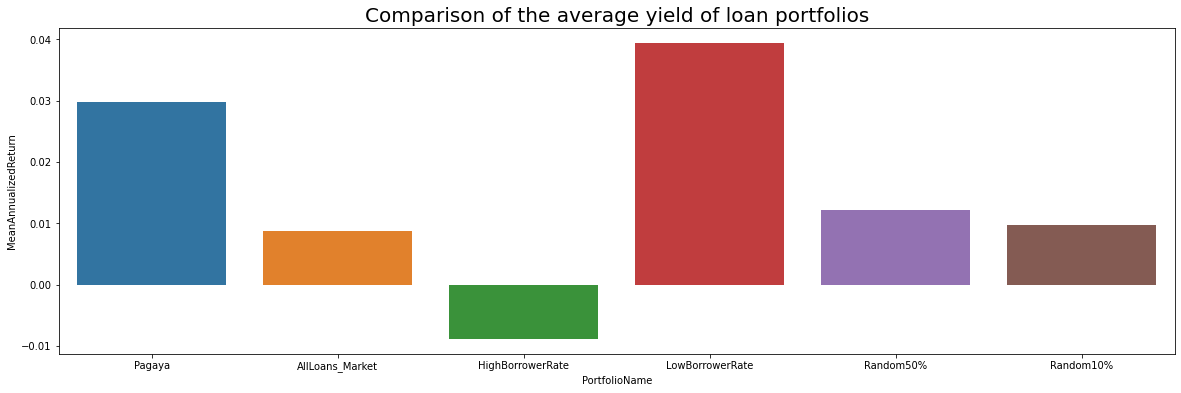

In [27]:
plt.figure(figsize = (20,6))
sns.barplot(x="PortfolioName", y="MeanAnnualizedReturn", data=CompDf)
plt.title("Comparison of the average yield of loan portfolios", fontsize=20)

**As we can see, Pagaya's portfolio beats the market**

Next, ploting the standard deviation:

Text(0.5, 1.0, 'Comparison of the Risks (STD) of loan portfolios')

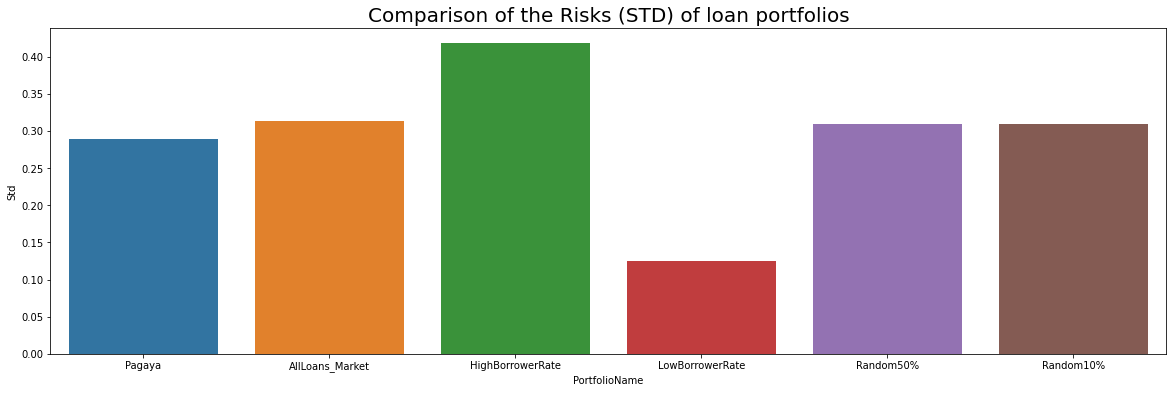

In [28]:
plt.figure(figsize = (20,6))
sns.barplot(x="PortfolioName", y="Std", data=CompDf)
plt.title("Comparison of the Risks (STD) of loan portfolios", fontsize=20)

**Pagaya's portfolio with lower risks then the market (less volatile)**

Next, ploting the sharpe ratio, the ratio between the Mean Annualized return and the STD.

(The Sharpe ratio was calculated relative to the excess return on the market)

Text(0.5, 1.0, 'Comparison of the Sharpe Ratio of loan portfolios')

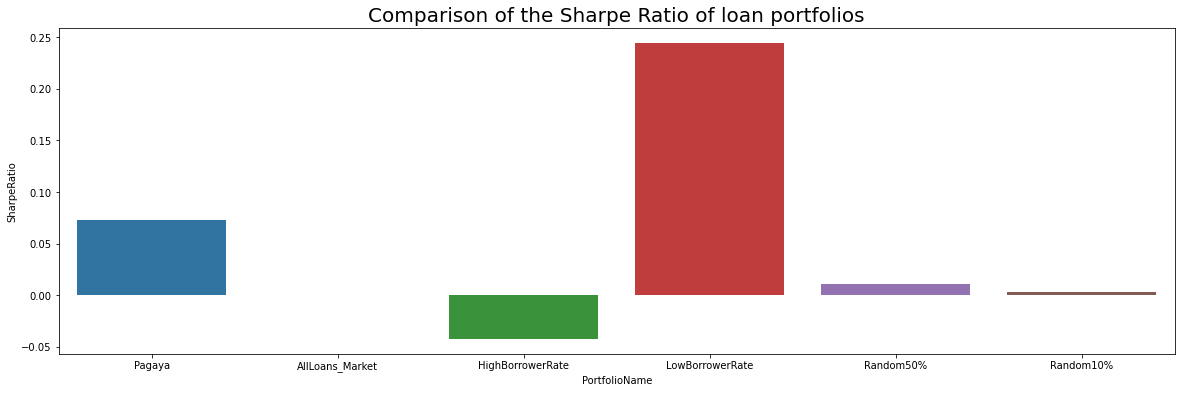

In [29]:
plt.figure(figsize = (20,6))
sns.barplot(x="PortfolioName", y="SharpeRatio", data=CompDf)
plt.title("Comparison of the Sharpe Ratio of loan portfolios", fontsize=20)

**Another point of view to compare the portfolios.**

The next plot will present the ratio between Loans that failed of loan portfolios:

Text(0.5, 1.0, 'Comparison of the Ratio between Loans that failed of loan portfolios')

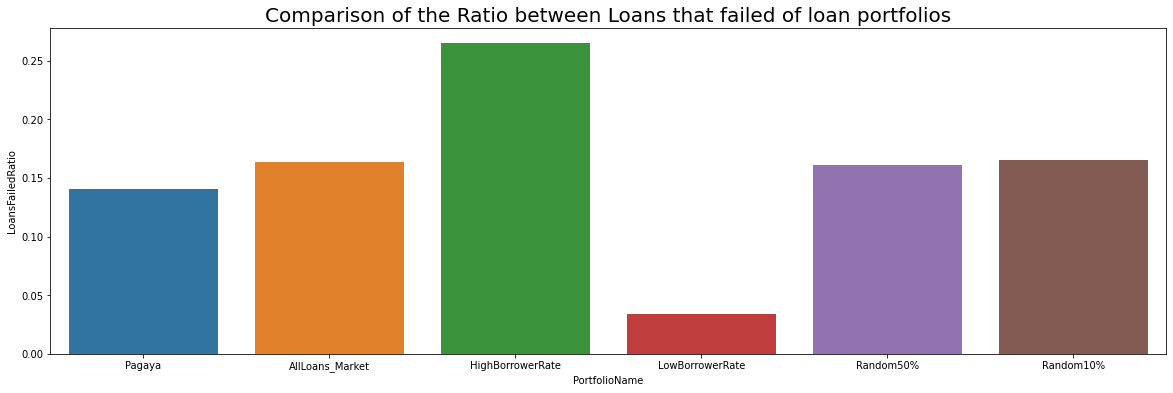

In [30]:
plt.figure(figsize = (20,6))
sns.barplot(x="PortfolioName", y="LoansFailedRatio", data=CompDf)
plt.title("Comparison of the Ratio between Loans that failed of loan portfolios", fontsize=20)

**As we can see, This feature has a significant impact on the returns.When the number of loans that failed was lower, the returns was the highest.(It makes sense).**

# Conclusion

**On the bottom line, Pagaya's Portfolio beats the Market**

There are some insights:

*   Pagaya choose loans with higher returns and less risks then invest on the market or choose randomly portfolios.
*   Pagaya choose loans to buy with a good probability that the loan will not fail.
*   The baseline of building portfolio by the lowest Borrower Rates Got the best results.

*   There are more steps that could be done to confirm this results:
 *   Statistically examine the selected portfolio against the market portfolio.
 *   Examine the Portfolio with a longer historical data.

* **The most important resource investment has to be on Predicting if loan will failed**

